In [1]:
import sys
sys.path.append("..")

import data_frame
import models
import importlib
import evaluator as ev
import yaml

2025-07-24 11:22:00.192096: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-24 11:22:00.206925: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/kdrabicki/anaconda3/envs/test_env/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
def load_config(config_path):
    with open(config_path, 'r') as file:
        config = yaml.full_load(file)
    return config

In [4]:
config = load_config("../configs/config.yml")

In [5]:
filePath = "../../KiDS-DR5-WCScut_x_DESI-DR1-small.fits"
df = data_frame.DataFrame(filePath, "QSO", data_frame.MaxFiller())

In [21]:
# df.data.loc[df.data["faint"], "MAG_GAAP_r"].min()

In [9]:
importlib.reload(models)
model = models.MLModelContext(strategy=models.MixtureGaussian(df, config))
model.train()
model.test_predict()

/home/kdrabicki/anaconda3/envs/test_env/lib/python3.12/site-packages/tf_keras/src/saving/serialization_lib.py:159: UserWarning: The object being serialized includes a `lambda`. This is unsafe. In order to reload the object, you will have to pass `safe_mode=False` to the loading function. Please avoid using `lambda` in the future, and use named Python functions instead. This is the `lambda` being serialized:         lambda t: MixtureNormal.new(  # pylint: disable=g-long-lambda
            t, num_components, event_shape, validate_args),

  config_arr = [serialize_keras_object(x) for x in obj]


Restoring model weights from the end of the best epoch: 2.


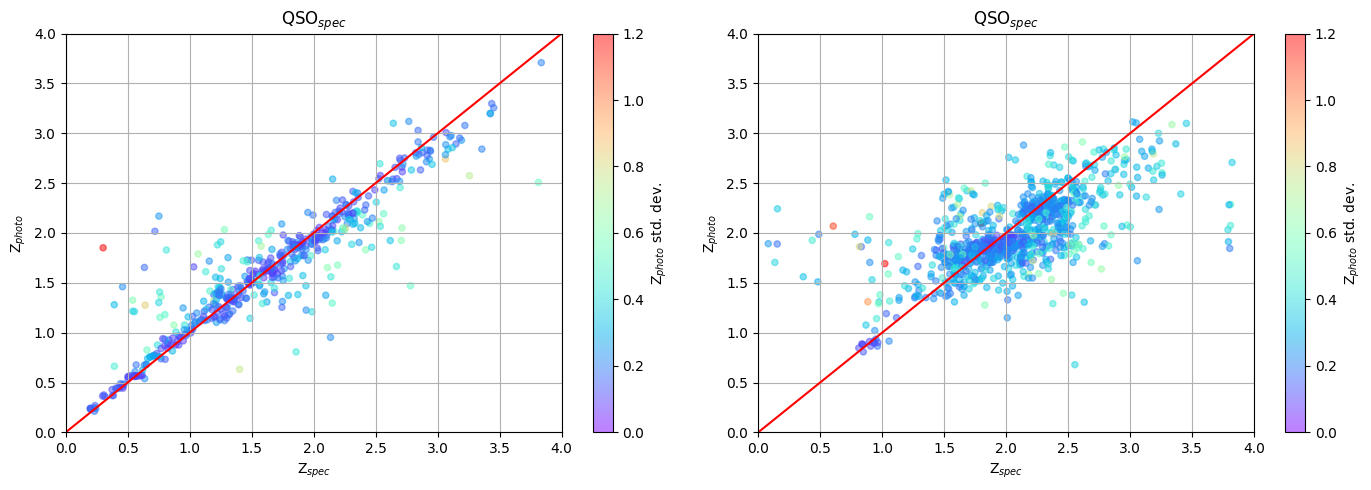

,MSE,R^2,Redshift error,NLL
test,0.092941,0.834164,"(0.007561490433265938, 0.1331448312995018)",3.097777
faint,0.218962,0.358566,"(-0.011188084868115868, 0.16571843966438154)",1.426488


In [26]:
importlib.reload(ev)

evaluator = ev.Evaluator(df)
evaluator.redshift_std()
evaluator.evaluate_metrics()
metrics = evaluator.evaluate_metrics()
# metrics.to_csv("../../metrics/sg_mean_stddev_dropout_2.csv")
metrics

In [31]:
df.data[df.data["split"] == "test"].to_csv("../../single_gaussian_output")

In [6]:
df.data.loc[df.data["split"]=="test", "log_prob"].mean()

np.float32(-0.527287)

'MG_2_components'

In [16]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
tfd = tfp.distributions

In [23]:
normal = tfd.Normal(loc=1, scale=1)
samples = normal.sample(10000).numpy()
lower = np.percentile(samples, 16, axis=0)
upper = np.percentile(samples, 84, axis=0)
std = (upper - lower) / 2
np.median(samples), samples.std(), std

(np.float32(0.9878669), np.float32(0.9957324), np.float32(0.9938885))